<span style='font-family:"Times New Roman"'><font size="3">ML-zoomcamp Data talks cours 6 : </font></span>
<br />
<br />
<br />
<br />
<span style='font-family:"Times New Roman"'><div align="center"><font size="6">**Decision Trees**</font></div></span>
<br /><br />
<span style='font-family:"Times New Roman"'><font size="5"><div align="right">*16 - 23 oct 2023*</div></font></span>
<br />
[cours](https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/06-trees)<br />
[ennoncé du devoir](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/06-trees/homework.md)</font></span></div>
<br />
_____
<span style='color:blue'></span>
<br />
<br />

## Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv('housing.csv')

### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [3]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
df = df.query("ocean_proximity == ('INLAND', '<1H OCEAN')")
df = df.fillna(0)
df['median_house_value'] = np.log1p(df.median_house_value)

df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN


In [5]:
df['ocean_proximity'] = df['ocean_proximity'].str.replace('<','less ')

In [6]:
df.ocean_proximity.value_counts()

ocean_proximity
less 1H OCEAN    9136
INLAND           6551
Name: count, dtype: int64

### split et vectorisation

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [8]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [9]:
df_train.shape

(9411, 9)

In [10]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [11]:
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=INLAND',
       'ocean_proximity=less 1H OCEAN', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

## Question 1: Decision trees

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [12]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [13]:
y_train = y_train.astype('int').values
y_val =y_val.astype('int').values
y_test =y_test.astype('int').values

In [14]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [15]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=less 1H OCEAN <= 0.50
|   |--- class: 11
|--- ocean_proximity=less 1H OCEAN >  0.50
|   |--- class: 12



In [16]:
X_train.shape

(9411, 10)

## Question 2 Random Forest

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=10,
                            random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
y_pred = rf.predict(X_val)

In [20]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.8925725668681274


In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error: 0.6437221159974506
Mean Squared Error: 0.7966857871255577


## Question3: n_estimators 25

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160


In [22]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    scores.append((n, RMSE))

In [23]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'RMSE'])

In [24]:
df_scores.round(3)

,n_estimators,RMSE
0,10,11.496
1,20,11.495
2,30,11.494
3,40,11.494
4,50,11.494
5,60,11.494
6,70,11.495
7,80,11.494
8,90,11.494
9,100,11.494


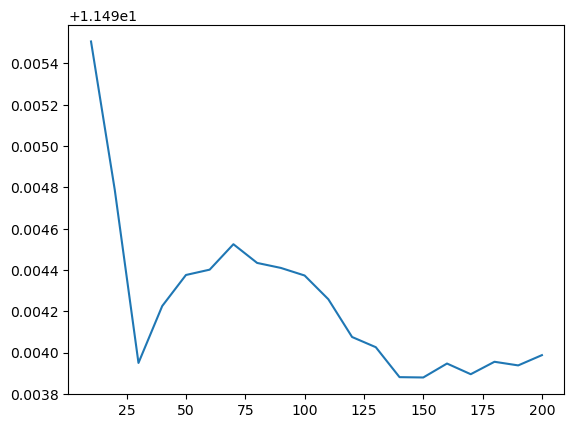

In [25]:
plt.plot(df_scores.n_estimators, df_scores.RMSE)

## Question 4: max_depth

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25


In [26]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


        scores.append((d, n, RMSE))

In [27]:
columns = ['max_depth', 'n_estimators', 'RMSE']
df_scores = pd.DataFrame(scores, columns=columns)

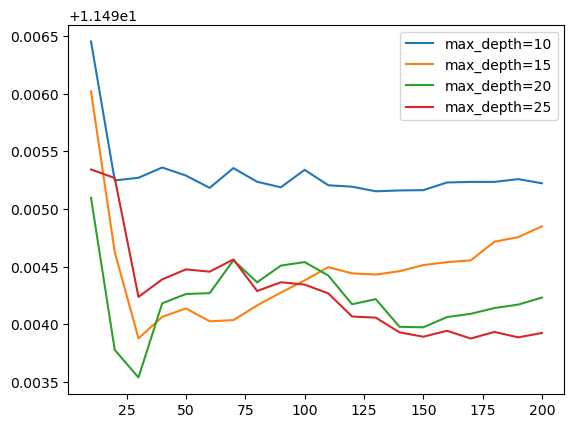

In [28]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.RMSE,
             label='max_depth=%d' % d)

plt.legend()

## Question 5 feature importance rep: median_income

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`

In [29]:
rf = RandomForestClassifier(n_estimators=10,
                            max_depth=20,
                            random_state=1,
                            n_jobs=-1
                           )
model = rf.fit(X_train, y_train)
model

RandomForestClassifier(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [30]:
print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_val, y_val)}")

model score on training data: 0.9867176708107533
model score on testing data: 0.8116634799235182


 ATTENTION MODELE EN OVERFITTING : score 0.988

In [31]:
importances = model.feature_importances_
print(features, importances)

['households' 'housing_median_age' 'latitude' 'longitude' 'median_income'
 'ocean_proximity=INLAND' 'ocean_proximity=less 1H OCEAN' 'population'
 'total_bedrooms' 'total_rooms'] [0.06188754 0.06631621 0.11238238 0.13307172 0.26310268 0.07615585
 0.07863511 0.07772356 0.05902429 0.07170066]


In [32]:
pd.DataFrame(importances, index=features)

,0
households,0.061888
housing_median_age,0.066316
latitude,0.112382
longitude,0.133072
median_income,0.263103
ocean_proximity=INLAND,0.076156
ocean_proximity=less 1H OCEAN,0.078635
population,0.077724
total_bedrooms,0.059024
total_rooms,0.071701


Feature: 0, Score: 0.06189
Feature: 1, Score: 0.06632
Feature: 2, Score: 0.11238
Feature: 3, Score: 0.13307
Feature: 4, Score: 0.26310
Feature: 5, Score: 0.07616
Feature: 6, Score: 0.07864
Feature: 7, Score: 0.07772
Feature: 8, Score: 0.05902
Feature: 9, Score: 0.07170


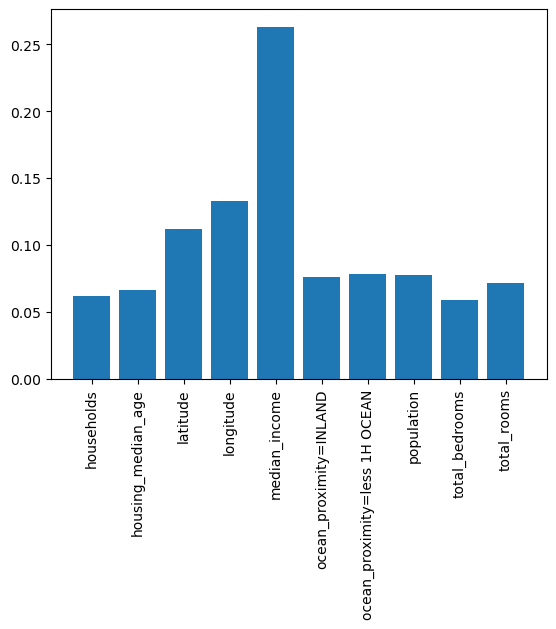

In [33]:
for i,v in enumerate(importances):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(features, importances)
plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
dict_fi = zip(features, importances)
df_fi = pd.DataFrame(dict_fi, columns=['feature', 'imp'])
df_fi.sort_values(by=['imp'], ascending=False)

,feature,imp
4,median_income,0.263103
3,longitude,0.133072
2,latitude,0.112382
6,ocean_proximity=less 1H OCEAN,0.078635
7,population,0.077724
5,ocean_proximity=INLAND,0.076156
9,total_rooms,0.071701
1,housing_median_age,0.066316
0,households,0.061888
8,total_bedrooms,0.059024


In [35]:
df_fi[df_fi['imp']==df_fi['imp'].max()]

,feature,imp
4,median_income,0.263103


## Question 6 XGBoost  rep 0.3

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [36]:
!pip install xgboost

In [37]:
import xgboost as xgb

In [38]:
features1=dv.get_feature_names_out().tolist()
features1

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=INLAND',
 'ocean_proximity=less 1H OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [40]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features1)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features1)

In [41]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [42]:
eval_set = [dtrain, dval]
eval_metric = ["rmse"]

In [43]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [44]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [45]:
s = output.stdout

In [50]:
print(s[:600])

[0]	train-rmse:0.54282	val-rmse:0.54278
[5]	train-rmse:0.36674	val-rmse:0.39189
[10]	train-rmse:0.33383	val-rmse:0.37696
[15]	train-rmse:0.31368	val-rmse:0.36902
[20]	train-rmse:0.30230	val-rmse:0.36609
[25]	train-rmse:0.29067	val-rmse:0.36533
[30]	train-rmse:0.27980	val-rmse:0.36339
[35]	train-rmse:0.27101	val-rmse:0.36346
[40]	train-rmse:0.26258	val-rmse:0.36134
[45]	train-rmse:0.25671	val-rmse:0.36065
[50]	train-rmse:0.24889	val-rmse:0.36010
[55]	train-rmse:0.24243	val-rmse:0.36082
[60]	train-rmse:0.23720	val-rmse:0.36095
[65]	train-rmse:0.23164	val-rmse:0.36032
[70]	train-rmse:0.22669	val-


In [51]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [52]:
df_score = parse_xgb_output(output)

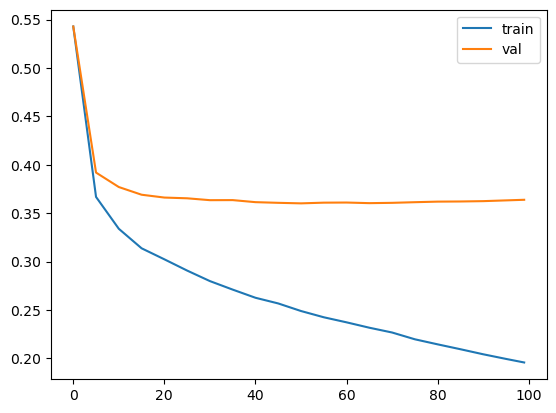

In [53]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

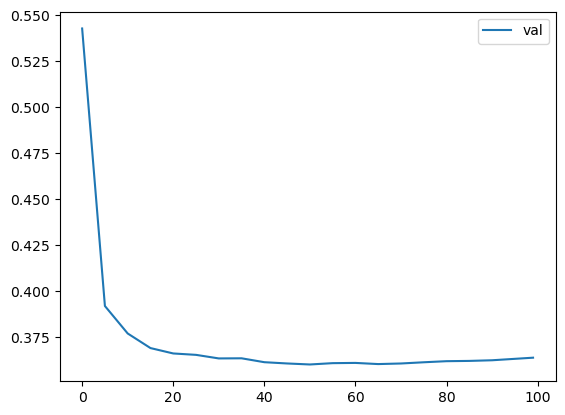

In [54]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [55]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [56]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features1)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features1)

In [57]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [58]:
s = output.stdout

In [59]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [60]:
df_score = parse_xgb_output(output)

In [66]:
print(s[:600])

[0]	train-rmse:0.61996	val-rmse:0.61679
[5]	train-rmse:0.48184	val-rmse:0.48666
[10]	train-rmse:0.41433	val-rmse:0.42692
[15]	train-rmse:0.38079	val-rmse:0.40145
[20]	train-rmse:0.36090	val-rmse:0.38821
[25]	train-rmse:0.34586	val-rmse:0.37979
[30]	train-rmse:0.33523	val-rmse:0.37423
[35]	train-rmse:0.32661	val-rmse:0.37108
[40]	train-rmse:0.31921	val-rmse:0.36807
[45]	train-rmse:0.31291	val-rmse:0.36599
[50]	train-rmse:0.30791	val-rmse:0.36437
[55]	train-rmse:0.30312	val-rmse:0.36270
[60]	train-rmse:0.29881	val-rmse:0.36190
[65]	train-rmse:0.29501	val-rmse:0.36128
[70]	train-rmse:0.29066	val-


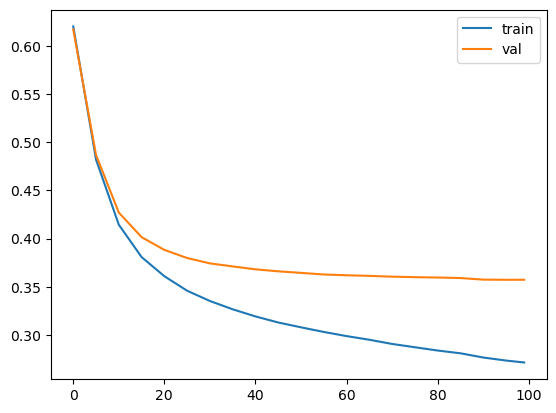

In [64]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

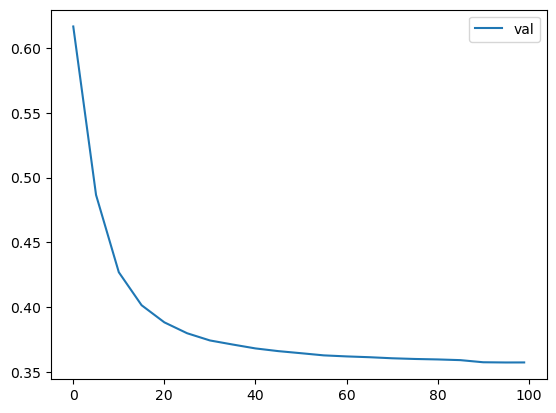

In [65]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.